<a href="https://colab.research.google.com/github/sujikathir/Sales-Forecasting/blob/main/Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediction 
Predicting the Sales using Time-series forecasting for month-wise data.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [74]:
data=pd.read_csv('/content/drive/My Drive/Sales Dataset 2020.csv')
data.head()

,ID,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,Feb-18,Mar-18,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18,Jan-19,Feb-19,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Q2-2017,Q3-2017,Q4-2017,Q1-2018,Q2-2018,Q3-2018,Q4-2018,Q1-2019,Q2-2019,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Year-2017,Year-2018,Year-2019,Year-2020,Total Sales,Category
0,2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,2668,2331,3695.0,3999,3539.0,2457.0,5605.0,1226.0,2712.0,3434.0,767.0,402.0,727.0,3574.0,200.0,102.0,204.0,2205.0,2711,1942,708.0,1224.0,2101.0,1735.0,1500.0,380.0,767.0,2000.0,826,1231.0,10323,11587.0,8694.0,9995.0,9543.0,4603.0,4501.0,2511.0,5361.0,5060.0,2647.0,2826.0,23141.0,32835.0,17433.0,5473.0,78882.0,1
1,4264,14300,67.0,11,42,31,90,107,23.0,80,29,56,82.0,31,114.0,32.0,100.0,76.0,50.0,35.0,102.0,20.0,4.0,10.0,60.0,3.0,30.0,77.0,83,15,40.0,110.0,35.0,60.0,42.0,11.0,63.0,120.0,21,78.0,163,210.0,167.0,177.0,226.0,157.0,74.0,110.0,138.0,205.0,116.0,141.0,451.0,727.0,527.0,257.0,1962.0,0
2,2747,10922,2.0,0,1,8,19,20,34.0,36,24,43,26.0,31,38.0,37.0,34.0,29.0,30.0,28.0,37.0,17.0,34.0,20.0,24.0,8.0,13.0,15.0,12,12,21.0,12.0,13.0,16.0,11.0,7.0,6.0,7.0,2,2.0,28,90.0,93.0,106.0,93.0,82.0,78.0,36.0,45.0,41.0,24.0,9.0,120.0,374.0,200.0,33.0,727.0,0
3,2746,10921,2.0,2,3,2,5,2,6.0,3,6,5,5.0,10,2.0,4.0,8.0,6.0,5.0,3.0,10.0,6.0,6.0,5.0,2.0,1.0,4.0,7.0,7,1,3.0,5.0,6.0,0.0,2.0,3.0,0.0,2.0,1,4.0,10,11.0,16.0,16.0,19.0,19.0,13.0,12.0,11.0,11.0,5.0,3.0,25.0,70.0,47.0,8.0,150.0,0
4,3439,12497,1.0,6,102,0,0,0,-2.0,337,16,112,8.0,9,49.0,33.0,0.0,73.0,5.0,16.0,8.0,10.0,23.0,13.0,53.0,25.0,22.0,92.0,970,23,65.0,16.0,110.0,62.0,9.0,87.0,8.0,14.0,1,7.0,102,335.0,136.0,91.0,78.0,34.0,89.0,139.0,1058.0,188.0,104.0,15.0,444.0,339.0,1474.0,119.0,2376.0,0


In [79]:
# parse dates
def custom_parser(x):
	return datetime.strptime(x, '%b-%y')

Creating and loading a new csv using the total of each month sales.

In [80]:
# load dataset
series = read_csv('/content/drive/MyDrive/altered sales dataset.csv', header=0, index_col=0, date_parser=custom_parser)
print(series)

               Sales
Month               
2017-05-01  20876.50
2017-06-01  17675.00
2017-07-01  34743.00
2017-08-01  32326.00
2017-09-01  16297.00
2017-10-01  20217.00
2017-11-01  38020.40
2017-12-01  17452.00
2018-01-01  15904.00
2018-02-01  17729.00
2018-03-01   9029.75
2018-04-01  10062.00
2018-05-01  16910.20
2018-06-01  12725.78
2018-07-01  45978.42
2018-08-01  22156.11
2018-09-01  50713.87
2018-10-01  54146.74
2018-11-01  48424.66
2018-12-01  40981.99
2019-01-01  18587.98
2019-02-01  13630.90
2019-03-01  20911.80
2019-04-01  13489.70
2019-05-01  14783.14
2019-06-01  19242.43
2019-07-01  17705.00
2019-08-01  12235.00
2019-09-01  20945.75
2019-10-01  12666.56
2019-11-01  10378.16
2019-12-01  20558.01
2020-01-01  20814.32
2020-02-01  24511.00
2020-03-01  23418.63
2020-04-01  30517.29
2020-05-01   2155.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


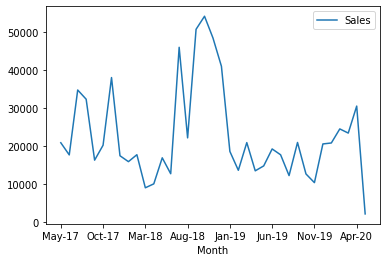

In [ ]:
#Visualising the Time-series data
series.plot()
import matplotlib.pyplot as plt
plt.show()

The data is also plotted as a time series with the month along the x-axis and sales figures on the y-axis.

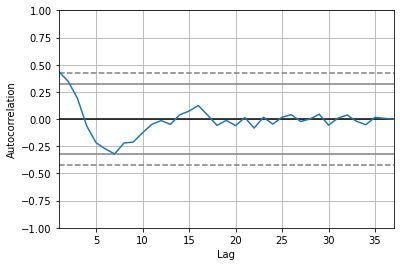

In [ ]:
# Autocorrelation plot of the time series
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

#ARIMA with Python
An ARIMA model can be created using the statsmodels library as follows:

1.   Define the model by calling ARIMA() and passing in the p, d, and q parameters. 
2.   The model is prepared on the training data by calling the fit() function.
3.   Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.


Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

First, we fit an ARIMA(7,1,0) model. 
This sets the lag value to 7 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   36
Model:                 ARIMA(7, 1, 0)   Log Likelihood                -385.902
Method:                       css-mle   S.D. of innovations          10776.872
Date:                Thu, 19 Nov 2020   AIC                            789.805
Time:                        10:49:21   BIC                            804.057
Sample:                    06-01-2017   HQIC                           794.779
                         - 05-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -289.5480    764.296     -0.379      0.708   -1787.541    1208.445
ar.L1.D.Sales    -0.5209      0.169     -3.074      0.005      -0.853      -0.189
ar.L2.D.Sales    -0.1458      0.185     

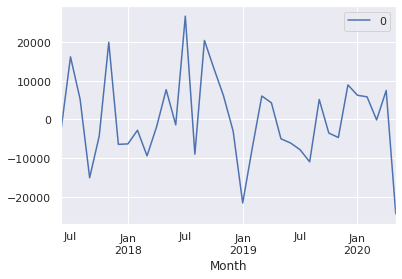

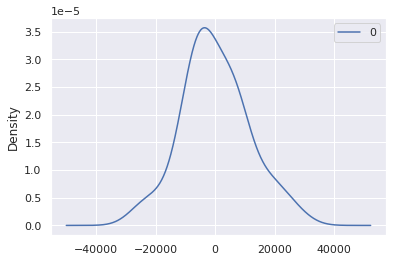

                  0
count     36.000000
mean     153.454730
std    11087.808867
min   -24411.147125
25%    -6351.649660
50%    -2337.523211
75%     6120.067444
max    26731.425328


In [81]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
# fit model
model = ARIMA(series, order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Running the above code prints a summary of the fit model. This summarizes the coefficient values used as well as the skill of the fit on the in-sample observations.

Next, we get a density plot of the residual error values, suggesting the errors are Gaussian.

predicted=20536.080757, expected=14783.140000
predicted=18266.142727, expected=19242.430000
predicted=16512.454204, expected=17705.000000
predicted=18141.970991, expected=12235.000000
predicted=15379.455566, expected=20945.750000
predicted=16794.828304, expected=12666.560000
predicted=14425.327155, expected=10378.160000
predicted=12908.525894, expected=20558.010000
predicted=15371.885604, expected=20814.320000
predicted=19590.579094, expected=24511.000000
predicted=25993.387696, expected=23418.630000
predicted=23053.328645, expected=30517.290000
predicted=27010.166021, expected=2155.000000
Test MSE: 71325718.939


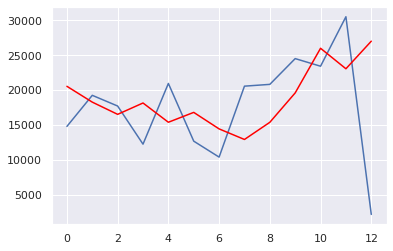

In [95]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#Grid Search using Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [46]:
# grid search sarima hyperparameters for monthly sales dataset
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from pandas import datetime

# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

if __name__ == '__main__':
	data = series.values
	print(data.shape)
	# data split
	n_test = 12
	# model configs
  cfg_list = sarima_configs(seasonal=[0,6,12])
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

(37, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.


 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 19324.733
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'n']] 13199.800
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'n']] 13435.886
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'n']] 9595.817
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'n']] 8910.761
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 8977.679
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 9382.483
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'n']] 9006.307
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'c']] 9175.471
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'c']] 8981.827
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'n']] 9056.617
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'c']] 8950.976
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'n']] 8867.336
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'c']] 9693.344
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'c']] 9187.244
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'c']] 9345.724
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'c']] 9150.124
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'c']] 11265.164
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 19149.443
 > Model[[(0, 0, 0), (0, 0, 1, 0), 't']] 1437